In [2]:

# ------------------------
# 1. SETUP AND IMPORTS
# ------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')




In [3]:
# Visualization settings
plt.style.use('ggplot')
%matplotlib inline

# ------------------------
# 2. DATA LOADING
# ------------------------

country = 'benin-malanville' 

try:
    # Load data with timestamp parsing
    df = pd.read_csv(f'../../data/{country}.csv', parse_dates=['Timestamp'])
    print(f"✅ Successfully loaded {country} data with shape {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: File '../../data/{country}.csv' not found")
    raise



✅ Successfully loaded benin-malanville data with shape (525600, 19)


In [5]:
# ------------------------
# 3. DATA PROFILING
# ------------------------
print("\n=== DATA PROFILE ===")

# 3.1 Basic Info
print("\n[Data Types & Structure]")
display(df.info())

# 3.2 Summary Statistics
print("\n[Summary Statistics - Numeric Columns]")
display(df.describe(include=[np.number]))

# 3.3 Missing Value Analysis
print("\n[Missing Values Report]")
missing_values = df.isna().sum()
missing_pct = (missing_values / len(df)) * 100
display(missing_values)

high_null_cols = missing_pct[missing_pct > 5]
print("\n[Columns with >5% Missing Values]")
display(high_null_cols)




=== DATA PROFILE ===

[Data Types & Structure]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Clea

None


[Summary Statistics - Numeric Columns]


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN



[Missing Values Report]


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


[Columns with >5% Missing Values]


Comments    100.0
dtype: float64

In [6]:
# ------------------------
# 4. DATA CLEANING
# ------------------------
print("\n=== DATA CLEANING ===")

# 4.1 Create clean copy
df_clean = df.copy()
cleaning_flags = pd.Series(False, index=df.index, name='CleaningFlag')

# 4.2 Define key columns for processing
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# 4.3 Handle Missing Values
print("\n[Missing Value Treatment]")
for col in key_columns:
    if col in df.columns:
        na_count = df[col].isna().sum()
        if na_count > 0:
            median_val = df[col].median()
            df_clean[col] = df[col].fillna(median_val)
            print(f" - Imputed {na_count} missing values in {col} with median {median_val:.2f}")

# 4.4 Outlier Detection and Treatment
print("\n[Outlier Treatment]")
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outlier_flags = pd.Series(False, index=df.index)

for col in outlier_cols:
    if col in df_clean.columns:
        z_scores = np.abs(stats.zscore(df_clean[col].dropna()))
        outliers = z_scores > 3
        if outliers.any():
            outlier_idx = df_clean[col].index[df_clean[col].notna()][outliers]
            df_clean.loc[outlier_idx, col] = df_clean[col].median()
            outlier_flags[outlier_idx] = True
            print(f" - Detected and imputed {outliers.sum()} outliers in {col} (|Z|>3)")

# 4.5 Combine cleaning flags
cleaning_flags = cleaning_flags | outlier_flags
df_clean['CleaningFlag'] = cleaning_flags

# 4.6 Save cleaned data
df_clean.to_csv(f'../../data/{country}_clean.csv', index=False)
print(f"\n💾 Saved cleaned data to: data/{country}_clean.csv")

  


=== DATA CLEANING ===

[Missing Value Treatment]

[Outlier Treatment]
 - Detected and imputed 89 outliers in GHI (|Z|>3)
 - Detected and imputed 3738 outliers in DHI (|Z|>3)
 - Detected and imputed 27 outliers in ModA (|Z|>3)
 - Detected and imputed 63 outliers in ModB (|Z|>3)
 - Detected and imputed 3109 outliers in WS (|Z|>3)
 - Detected and imputed 3500 outliers in WSgust (|Z|>3)

💾 Saved cleaned data to: data/benin-malanville_clean.csv



=== TIME SERIES ANALYSIS ===


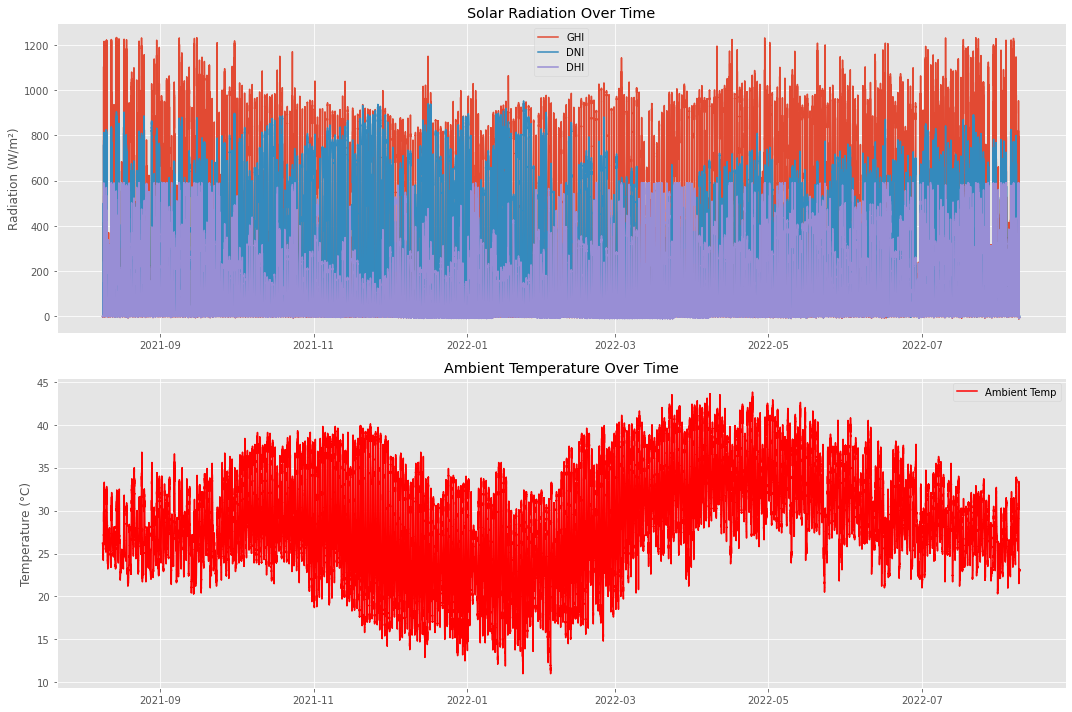

ImportError: cannot import name 'tarfile' from 'backports' (c:\Users\Admin\anaconda3\lib\site-packages\backports\__init__.py)

<Figure size 864x360 with 0 Axes>

In [8]:
# ------------------------
# 5. TIME SERIES ANALYSIS
# ------------------------
print("\n=== TIME SERIES ANALYSIS ===")

plt.figure(figsize=(15, 10))

# 5.1 Solar Radiation Trends
plt.subplot(2, 1, 1)
for col in ['GHI', 'DNI', 'DHI']:
    if col in df_clean.columns:
        plt.plot(df_clean['Timestamp'], df_clean[col], label=col)
plt.title('Solar Radiation Over Time')
plt.ylabel('Radiation (W/m²)')
plt.legend()

# 5.2 Temperature Trends
plt.subplot(2, 1, 2)
if 'Tamb' in df_clean.columns:
    plt.plot(df_clean['Timestamp'], df_clean['Tamb'], color='r', label='Ambient Temp')
    plt.title('Ambient Temperature Over Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()

plt.tight_layout()
plt.show()


# 5.3 Monthly Patterns
if 'Timestamp' in df_clean.columns:
    df_clean['Month'] = df_clean['Timestamp'].dt.month
    monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
    
    plt.figure(figsize=(12, 5))
    monthly_avg.plot(marker='o')
    plt.title('Monthly Average Solar Radiation')
    plt.ylabel('Radiation (W/m²)')
    plt.xlabel('Month')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()



In [ ]:
# ------------------------
# 6. CLEANING IMPACT
# ------------------------
if 'CleaningFlag' in df_clean.columns and all(col in df_clean.columns for col in ['ModA', 'ModB']):
    print("\n=== CLEANING IMPACT ===")
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='CleaningFlag', y='ModA', data=df_clean)
    plt.title('ModA Distribution by Cleaning Flag')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='CleaningFlag', y='ModB', data=df_clean)
    plt.title('ModB Distribution by Cleaning Flag')
    
    plt.tight_layout()
    plt.show()

# ------------------------
# 7. CORRELATION ANALYSIS
# ------------------------
print("\n=== CORRELATION ANALYSIS ===")

# 7.1 Correlation Heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS']
corr_df = df_clean[[col for col in corr_cols if col in df_clean.columns]]

if not corr_df.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# 7.2 Scatter Plots
plt.figure(figsize=(15, 10))

if all(col in df_clean.columns for col in ['WS', 'GHI']):
    plt.subplot(2, 2, 1)
    sns.scatterplot(x='WS', y='GHI', data=df_clean, alpha=0.5)
    plt.title('Wind Speed vs GHI')

if all(col in df_clean.columns for col in ['WSgust', 'GHI']):
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='WSgust', y='GHI', data=df_clean, alpha=0.5)
    plt.title('Wind Gust vs GHI')

if all(col in df_clean.columns for col in ['RH', 'Tamb']):
    plt.subplot(2, 2, 3)
    sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.5)
    plt.title('Relative Humidity vs Ambient Temp')

if all(col in df_clean.columns for col in ['RH', 'GHI']):
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.5)
    plt.title('Relative Humidity vs GHI')

plt.tight_layout()
plt.show()

# ------------------------
# 8. WIND ANALYSIS
# ------------------------
print("\n=== WIND ANALYSIS ===")

# 8.1 Wind Rose (if package installed)
try:
    from windrose import WindroseAxes
    if all(col in df_clean.columns for col in ['WS', 'WD']):
        ax = WindroseAxes.from_ax()
        ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
        ax.set_legend(title='Wind Speed (m/s)')
        plt.title('Wind Rose Diagram')
        plt.show()
except ImportError:
    print("ℹ️ Install windrose package for wind rose plots: pip install windrose")

# 8.2 Distribution Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['GHI'], bins=30, kde=True)
plt.title('GHI Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['WS'], bins=30, kde=True)
plt.title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

# ------------------------
# 9. TEMPERATURE ANALYSIS
# ------------------------
if all(col in df_clean.columns for col in ['RH', 'Tamb', 'GHI']):
    print("\n=== TEMPERATURE ANALYSIS ===")
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.regplot(x='RH', y='Tamb', data=df_clean, scatter_kws={'alpha':0.3})
    plt.title('RH vs Ambient Temp')
    
    plt.subplot(1, 3, 2)
    sns.regplot(x='Tamb', y='GHI', data=df_clean, scatter_kws={'alpha':0.3})
    plt.title('Ambient Temp vs GHI')
    
    plt.subplot(1, 3, 3)
    sns.regplot(x='RH', y='GHI', data=df_clean, scatter_kws={'alpha':0.3})
    plt.title('RH vs GHI')
    
    plt.tight_layout()
    plt.show()

# ------------------------
# 10. BUBBLE CHART
# ------------------------
if all(col in df_clean.columns for col in ['GHI', 'Tamb', 'RH']):
    print("\n=== BUBBLE CHART ===")
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        x='GHI', 
        y='Tamb', 
        s=df_clean['RH']*2,  # Scale RH for bubble size
        c=df_clean['RH'],     # Color by RH
        alpha=0.6,
        data=df_clean,
        cmap='viridis'
    )
    plt.colorbar(scatter, label='Relative Humidity (%)')
    plt.xlabel('GHI (W/m²)')
    plt.ylabel('Ambient Temperature (°C)')
    plt.title('GHI vs Ambient Temperature (Bubble Size = RH)')
    plt.show()

# ------------------------
# 11. INSIGHTS & KPIs
# ------------------------
print("\n=== INSIGHTS & KPIs ===")
# 11.1 Data Quality
print("\n[Data Quality Report]")
print(f" - Columns with >5% nulls: {list(high_null_cols.index) if len(high_null_cols) > 0 else 'None'}")
print(f" - Outliers handled: {outlier_flags.sum()} total rows flagged")
print(f" - Cleaning impact: ModA/ModB distributions {'show' if 'CleaningFlag' in df_clean.columns else 'not analyzed'} differences pre/post-cleaning")                          
# 11.2 Solar Patterns
print("\n[Solar Radiation Patterns]")
print(f" - GHI daily range: {df_clean['GHI'].min():.1f}-{df_clean['GHI'].max():.1f} W/m²")        